# WINE DATASET EDA 
___


+ ## Exploración básica de datos.

In [6]:
#Importando librerias de Python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [7]:
#lectura del archivo y vista de las 5 primeras filas
df=pd.read_csv("wine_reviews_dataset.csv", index_col="Unnamed: 0")
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


In [9]:
# definiendo ruta
path_to_data="./wine_reviews_dataset.csv"

In [10]:
#clasificando variables
categoricas=["Unnamed: 0","country", "description", "designation", "province", "region_1", "region_2", "taster_name", "taster_twitter_handle", "title", "variety", "winery"]
numericas=(["points", "price"])

In [11]:
# creando nueva tabla df1: contiene country, points, price, variety, winery
df1 = df.drop(columns=["description","province", "designation","taster_name","taster_twitter_handle","title"])
df1.head()

,country,points,price,region_1,region_2,variety,winery
0,Italy,87,NaN,Etna,NaN,White Blend,Nicosia
1,Portugal,87,15.0,NaN,NaN,Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Willamette Valley,Willamette Valley,Pinot Gris,Rainstorm
3,US,87,13.0,Lake Michigan Shore,NaN,Riesling,St. Julian
4,US,87,65.0,Willamette Valley,Willamette Valley,Pinot Noir,Sweet Cheeks


In [12]:
# Cuantos missing values hay en el dataset por cada columna
df1.isnull().sum()

country        63
points          0
price        8996
region_1    21247
region_2    79460
variety         1
winery          0
dtype: int64

<p> Hay muchos datos NaN para precio, </p>

In [13]:
# Principales descriptores estadisticos
df1.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


<p> Observamos que hay una gran SD en los precios de los vinos, siendo el más barato 4 y el más caro 3300. 
De manera contraria la SD de los puntos es menor, siendo el puntake minimo 80 y maximo 100.</p>

<AxesSubplot:>

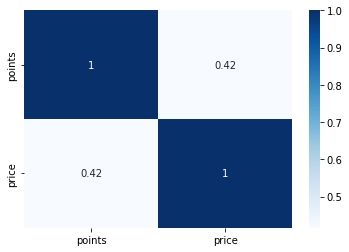

In [14]:
# Evaluando correlación entre precio y puntos
sns.heatmap(df1.corr(), annot=True, cmap='Blues')

<p> R = 0.42 => baja correlación entre puntaje y precio </p>

<AxesSubplot:xlabel='points', ylabel='price'>

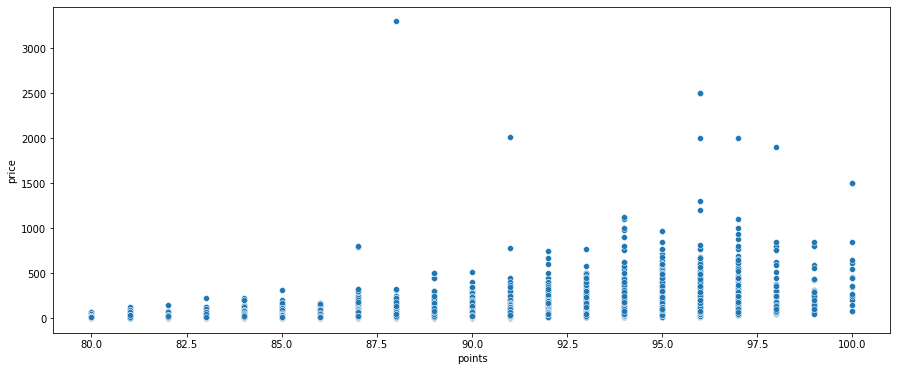

In [15]:
# Evaluando precios vs puntaje 
plt.figure(figsize=(15,6))
sns.scatterplot(data = df1, x= 'points', y ='price')

<p> Se observa que varios vinos más caros tienen más puntaje, pero también hay vinos baratos con muy buen puntaje.</p>

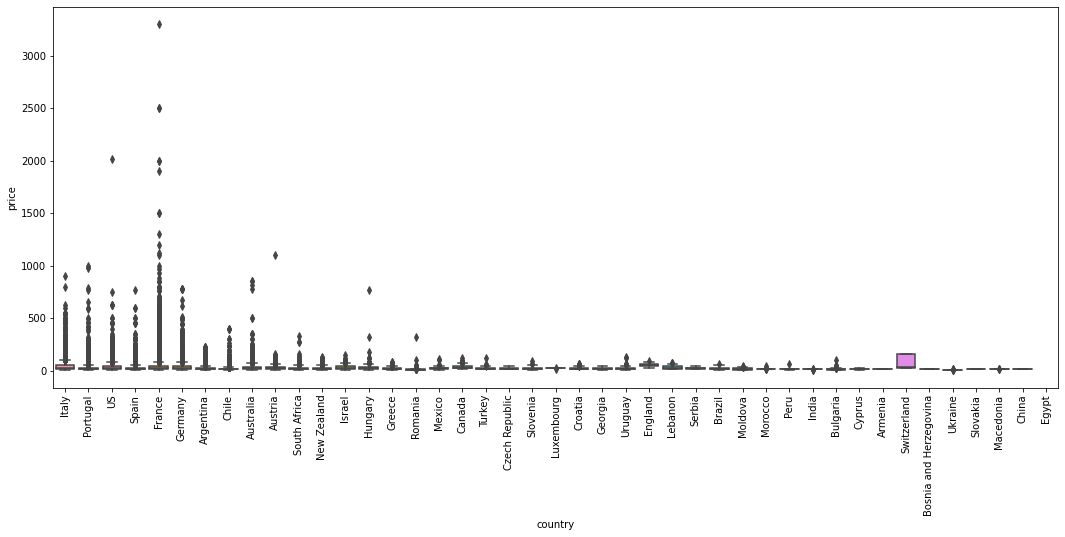

In [16]:
# Evaluando precios por país
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.boxplot(y='price', x='country', data=df1, ax=ax)
plt.xticks(rotation=90)
plt.show()

<p> Los diagramas de caja están muy cerca uno del otro => difícil hacer una inferencia. 
Se observa que los vinos más caros provienen de paises como Francia (3300), US, Australia, Protugal, Italia, Españas </p>


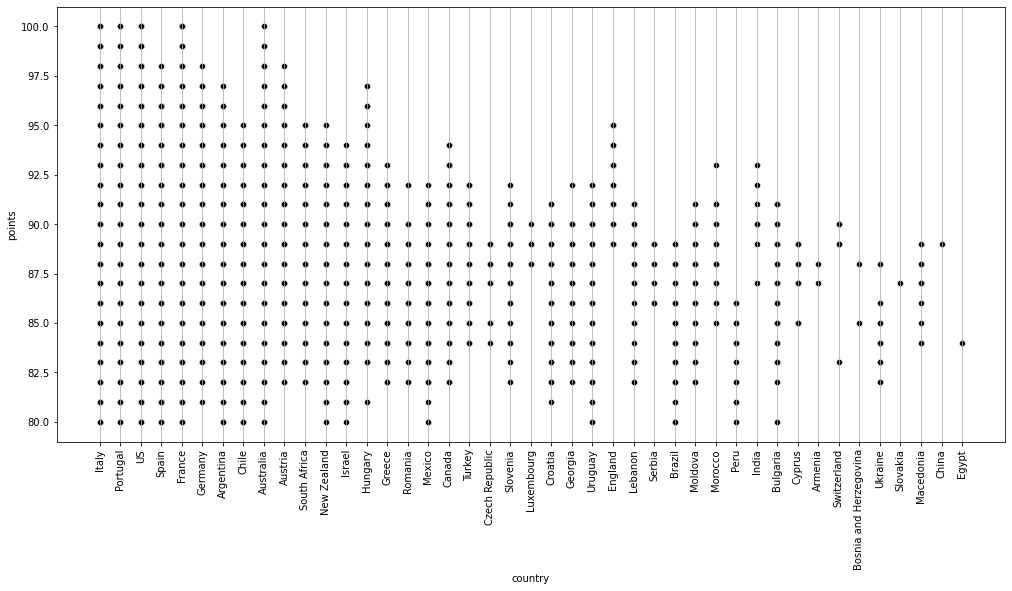

In [17]:
# Evaluando puntajes por país
plt.figure(figsize=(17,8))
sns.scatterplot(data = df1, y='points', x='country', color='black')
plt.grid(axis='x')
plt.xticks(rotation=90);

<p> Se observa que los vinos con puntaje de 100 provienen de Italia, Portugal, Francia y Australia, pero estos mismos paises tambien los puntajes más bajos.
También vemos que países como Inglaterra, Luxemburgo e India no tienen vinos con bajos puntajes </p>

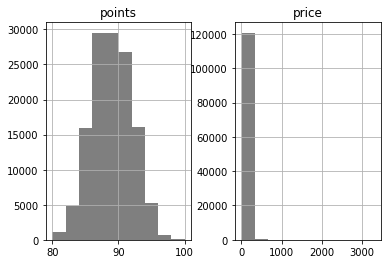

In [18]:
# Evaluando la distribución de los datos
df1.hist(color='k', alpha=0.5, bins=10)
plt.show()


<p> Distribución de puntaje => normal; mientras que distribución de precios está a la izquierda, mayoría tiene precios bajos </p>

In [19]:
# Cambiando los precios de variable numérica a categórica
bins = [0,300,500,1000,2000,3300]
names = ["0-300","301-500","501-1000","1001-2000","2001-3300"]
df["price"] = pd.cut(df["price"], bins, labels = names)
df.iloc[:, [1,5]]

,description,province
0,"Aromas include tropical fruit, broom, brimston...",Sicily & Sardinia
1,"This is ripe and fruity, a wine that is smooth...",Douro
2,"Tart and snappy, the flavors of lime flesh and...",Oregon
3,"Pineapple rind, lemon pith and orange blossom ...",Michigan
4,"Much like the regular bottling from 2012, this...",Oregon
...,...,...
129966,Notes of honeysuckle and cantaloupe sweeten th...,Mosel
129967,Citation is given as much as a decade of bottl...,Oregon
129968,Well-drained gravel soil gives this wine its c...,Alsace
129969,"A dry style of Pinot Gris, this is crisp with ...",Alsace


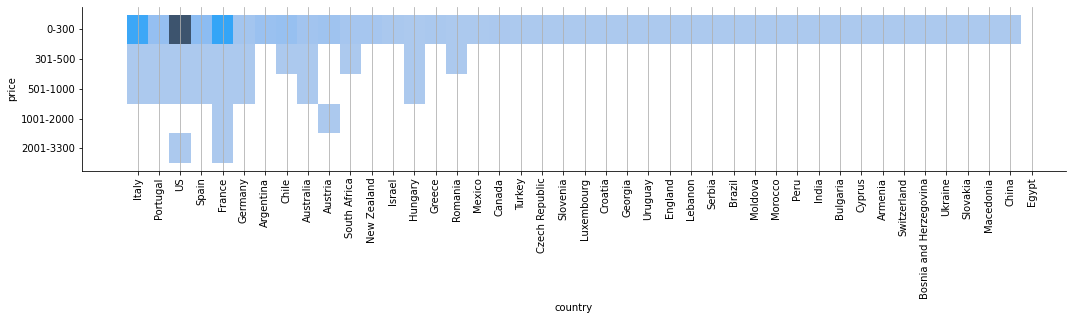

In [20]:
# Visualizando los rangos de precios por paises
sns.displot(x="country" , y="price", data=df, height = 3, aspect = 5)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

<p> Todos los paises tienen vinos en el rango de precio de 0-300, mientras que solo 12 paises tienen vinos que sobrepsan el limite de precio de 300 </p>

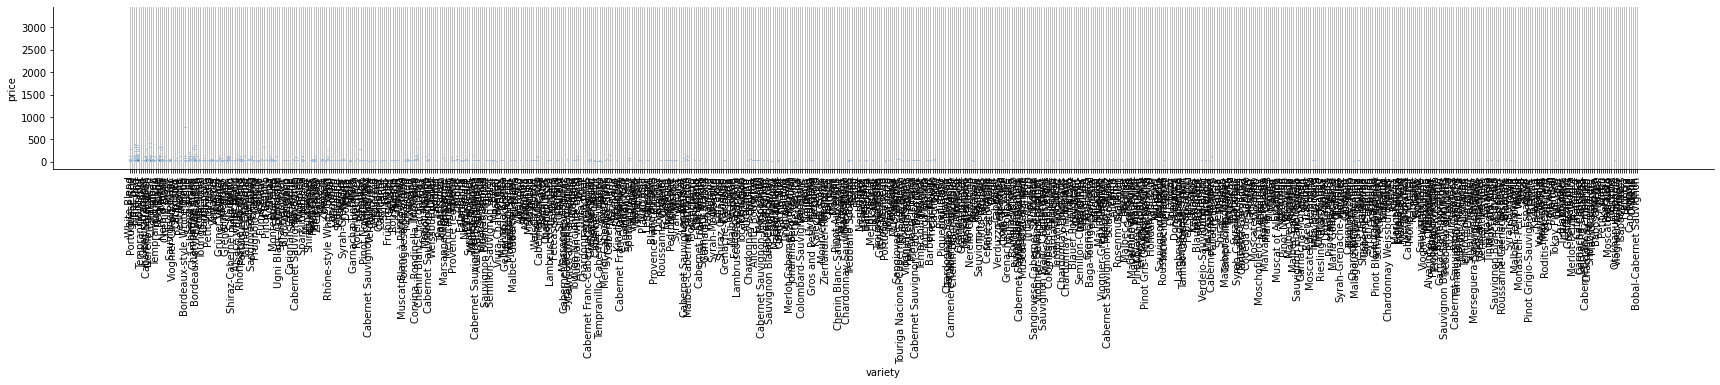

In [21]:
# Analizando variedad por precio
sns.displot(x="variety" , y="price", data=df1, height = 3, aspect = 8)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Analizando solo los vinos con precio mayor a 300
df3=df1 [df1["price"] > 300] 
df3.head()

,country,points,price,region_1,region_2,variety,winery
345,Australia,100,350.0,Rutherglen,NaN,Muscat,Chambers Rosewood Vineyards
346,Australia,98,350.0,Rutherglen,NaN,Muscadelle,Chambers Rosewood Vineyards
347,Germany,97,775.0,NaN,NaN,Riesling,Robert Weil
351,Hungary,96,320.0,NaN,NaN,Furmint,Oremus
353,France,96,630.0,Montrachet,NaN,Chardonnay,Louis Latour


In [23]:
df3.describe()

,points,price
count,316.000000,316.000000
mean,94.984177,526.310127
std,2.438397,337.737052
min,85.000000,301.000000
25%,94.000000,352.500000
50%,95.000000,450.000000
75%,96.000000,550.000000
max,100.000000,3300.000000


In [24]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 345 to 128991
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   316 non-null    object 
 1   points    316 non-null    int64  
 2   price     316 non-null    float64
 3   region_1  259 non-null    object 
 4   region_2  21 non-null     object 
 5   variety   316 non-null    object 
 6   winery    316 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 19.8+ KB


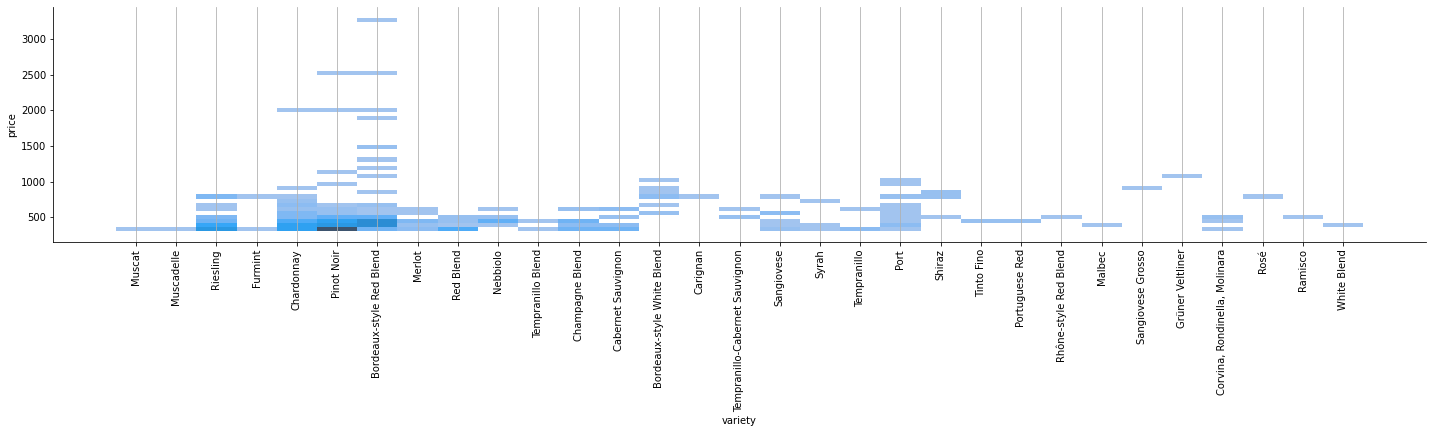

In [25]:
# Graficando los vinos >300 por precio y pais
sns.displot(x="variety" , y="price", data=df3, height = 4, aspect = 5)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

<p> La variedad Bordeaux-Style Red Blend es con la que se elaboran los vinos más caros, seguido de Pinnot Neir y Chardonnay. </p>

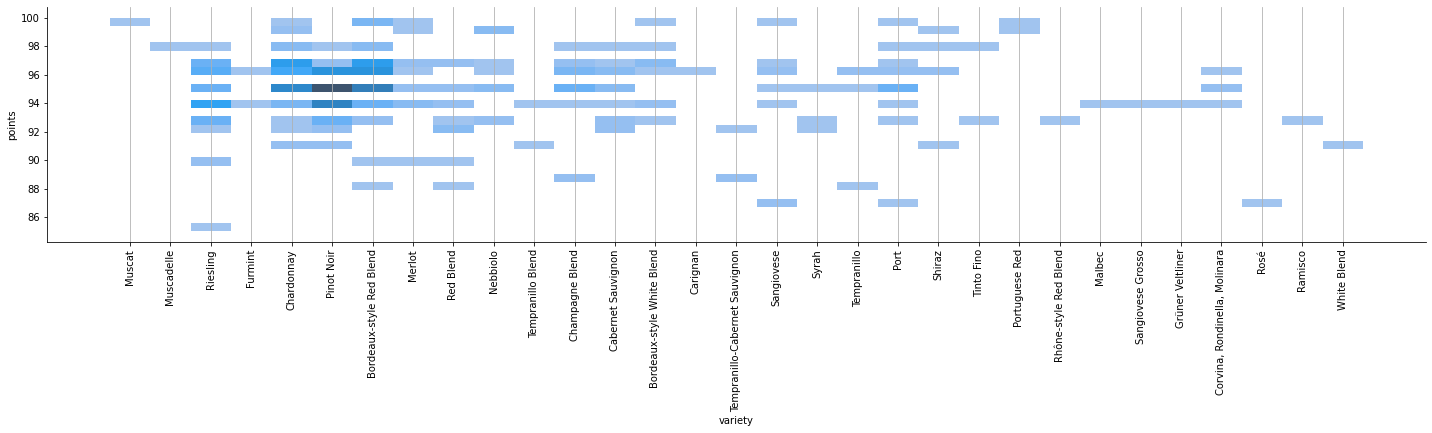

In [26]:
# Graficando los vinos >300 por puntaje y Variedad 
sns.displot(x="variety" , y="points", data=df3, height = 4, aspect = 5)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

<p> Hay variedades con puntaje de 100, que no necesariamente son los vinos más caros: Muscat, Merlot, Nebbiolo, Bordeaux Style White Blend, Port, Portugueses Red y Sangloveses. </p>

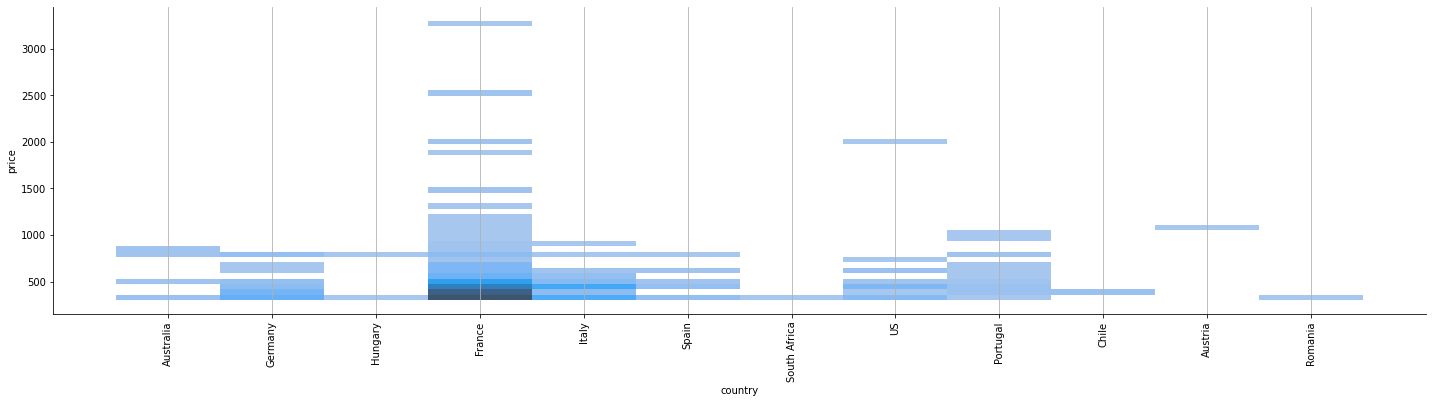

In [27]:
# Graficando los vinos >300 por precio y pais
sns.displot(x="country" , y="price", data=df3, height = 5, aspect = 4)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

<p> Los vinos más caros se elaboran mayoritariamente en Francia.  </p>

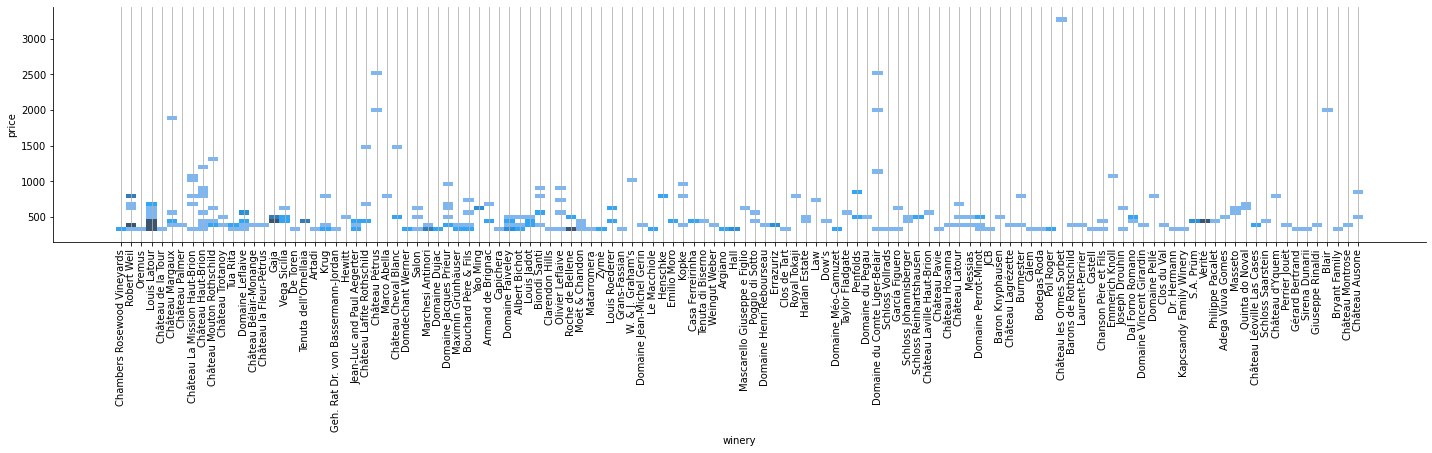

In [28]:
# Graficando los vinos >300 por precio y winery
sns.displot(x="winery" , y="price", data=df3, height = 4, aspect = 5)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

<p> Winery que vende el vino más caro es Chateu les Onmes Sorbet, seguida por otras dos bodegas francesas </p>

In [29]:
# Analizando solo los vinos de Francia
is_France = df3.loc[:, 'country'] == 'France'
df_France = df3.loc[is_France]
df_France.head()

,country,points,price,region_1,region_2,variety,winery
353,France,96,630.0,Montrachet,NaN,Chardonnay,Louis Latour
357,France,95,350.0,Clos de Vougeot,NaN,Pinot Noir,Château de la Tour
363,France,95,380.0,Criots-Bâtard-Montrachet,NaN,Chardonnay,Louis Latour
1558,France,98,1900.0,Margaux,NaN,Bordeaux-style Red Blend,Château Margaux
1559,France,98,380.0,Margaux,NaN,Bordeaux-style Red Blend,Château Palmer


In [30]:
df_France.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 353 to 127566
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   172 non-null    object 
 1   points    172 non-null    int64  
 2   price     172 non-null    float64
 3   region_1  172 non-null    object 
 4   region_2  0 non-null      object 
 5   variety   172 non-null    object 
 6   winery    172 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 10.8+ KB


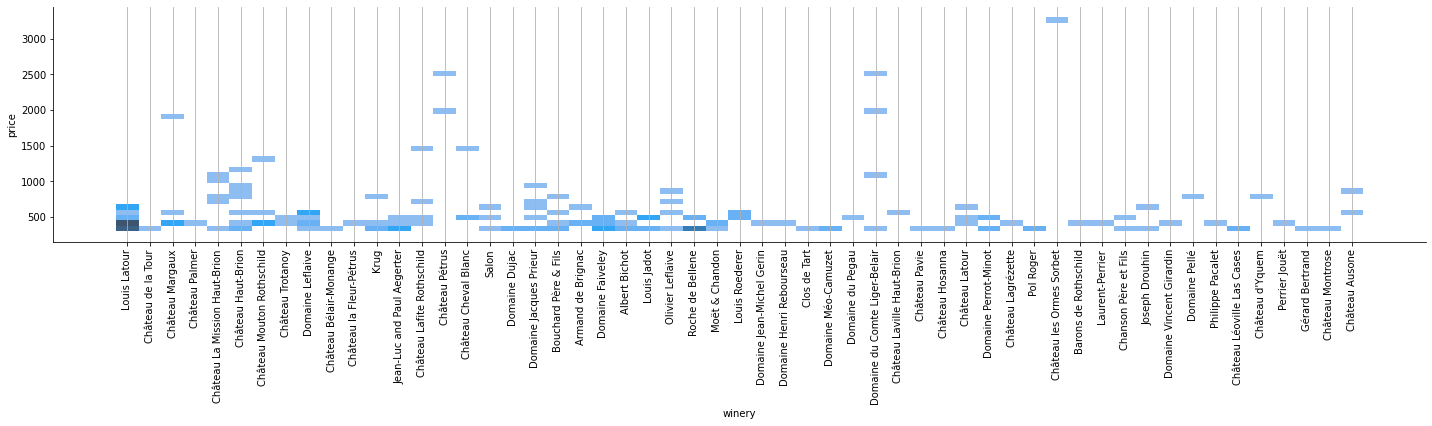

In [31]:
# Graficando los vinos franceses>300 por precio y region
sns.displot(x="winery" , y="price", data=df_France, height = 4, aspect = 5)
plt.grid(axis='x')
plt.xticks(rotation=90)
plt.show()

# Ingeniería de Características

+ ### Limpieza de datos.

In [38]:
#DataFrame

df=pd.read_csv("wine_reviews_dataset.csv", index_col="Unnamed: 0")
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Se observa: 
+ Datos vacíos que han sido llenados por defecto con "NaN". 

In [50]:
# Datos duplicados

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
129966    False
129967    False
129968    False
129969    False
129970    False
Length: 129971, dtype: bool

In [59]:
df_filas_duplicadas = df[df.duplicated()]
print(df_filas_duplicadas)

       country                                        description  \
2408        US  This is weighty, creamy and medium to full in ...   
2409     Italy  There's a touch of toasted almond at the start...   
2410     Chile  Lightly herbal strawberry and raspberry aromas...   
2412     Italy  The Monica grape often shows a rustic or raw q...   
2413    France  Fruity and lightly herbaceous, this has fine t...   
...        ...                                                ...   
129879      US  This wine is a blend of 45% Grenache, 37% Syra...   
129880      US  Apple blossom intrigues on the nose of this li...   
129881   Spain  This Verdejo smells like citrus fruits and wil...   
129882      US  This wine is mostly Cabernet Sauvignon (78%), ...   
129913      US  This is taut and dense, and requires time and ...   

               designation  points  price           province  \
2408                   NaN      85   14.0         California   
2409    Sallier de la Tour      85   13.0  

Nota:
+ Nueva variable.

In [61]:
df_filas_duplicadas.drop_duplicated()

AttributeError: 'DataFrame' object has no attribute 'drop_duplicated'

In [63]:
df_filas_duplicadas.isnull().mean().sort_values(ascending = False)

region_2                 0.625163
designation              0.292497
taster_twitter_handle    0.177001
region_1                 0.168987
taster_name              0.132926
price                    0.060202
country                  0.000401
province                 0.000401
description              0.000000
points                   0.000000
title                    0.000000
variety                  0.000000
winery                   0.000000
dtype: float64

Se observa:
+ Porcentaje de falta de datos en orden. En base a ello determinar las variables ocn las que se van a trabajar.
+ Discusión entorno a la variable "region_2". 

+ ### ¿Qué podemos hacer con los datos "NaN"?

In [33]:
#Filtrar eliminando filas con datos incompletos (NaN).

df_filtrado = df.dropna()
df_filtrado.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


Se observa:
+ No es recomendable porque perdemos datos. 

In [34]:
# Reemplazar los "NaN" con valor 0.

df_filtrado = df.fillna(0)
df_filtrado.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,0.0,Sicily & Sardinia,Etna,0,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,0,0,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",0,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,0,Alexander Peartree,0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


Se observa:
+ No se eliminan las filas, solo se reemplaza "NaN" con valor 0, conservando así el resto de datos.
+ Según la info del DataFrame, la variable "price (precio)" hace falta 8996 datos, por lo que reemplazarlo por 0 podría generar sesgo. 
+ También faltan datos de las variables "country", "region_1", "region_2" y "variety" que son variables categóricas por lo que reemplazar los datos faltantes con "0" dificultaría.

In [39]:
# Posibilidad 1: Filtrar columnas.

df_filtrado[["country", "description", "price", "designation", "points", "province", "region_1", "region_2", "taster_name", "taster_twitter_handle", "title", "variety", "winery"]]

,country,description,price,designation,points,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",0.0,Vulkà Bianco,87,Sicily & Sardinia,Etna,0,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",15.0,Avidagos,87,Douro,0,0,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",14.0,0,87,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",13.0,Reserve Late Harvest,87,Michigan,Lake Michigan Shore,0,Alexander Peartree,0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",65.0,Vintner's Reserve Wild Child Block,87,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,28.0,Brauneberger Juffer-Sonnenuhr Spätlese,90,Mosel,0,0,Anna Lee C. Iijima,0,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,75.0,0,90,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,30.0,Kritt,90,Alsace,Alsace,0,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",32.0,0,90,Alsace,Alsace,0,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


Se observa:
+ Columna "Unnamed:0" eliminada.

In [40]:
# Posibilidad 2: Filtrado por condiciones.

df_filtrado[df_filtrado["price"] > 0]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,0,0,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",0,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,0,Alexander Peartree,0,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,0,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,0,0,Anna Lee C. Iijima,0,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,0,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,0,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",0,90,32.0,Alsace,Alsace,0,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


Se observa:
+ La condición del filtrado es que considere todos los valores mayores que "0".
+ Las filas donde el valor de "price" es "0" se eliminan, perdiendo datos de las demás variables que se encuentran en la fila.
+ Se pierden menos datos que eliminando todas las filas donde aparezca "NaN o 0" ya que solo se eliminan las filas donde price sea valor "0". 

+ ## Reemplazo de datos faltantes.

In [54]:
# Reemplazo en variable numérica. Por columna.
promedio = df_filas_duplicadas["price"].mean()
mediana = df_filas_duplicadas["price"].median()
moda = df["price"].mode()[0]
print(promedio, mediana, moda)

35.363389129985535 25.0 20.0


Se observa:
+ Promedio_precio = 35.363389129985535.
+ Mediana_precio = 25.0
+ Moda_precio = 20.0

In [53]:
# Los datos que faltan en la variable categórica. Por columna.
print(df["region_2"].fillna("DESCONOCIDO"))

0               DESCONOCIDO
1               DESCONOCIDO
2         Willamette Valley
3               DESCONOCIDO
4         Willamette Valley
                ...        
129966          DESCONOCIDO
129967         Oregon Other
129968          DESCONOCIDO
129969          DESCONOCIDO
129970          DESCONOCIDO
Name: region_2, Length: 129971, dtype: object


In [45]:

valores_por_defecto = {"region_2" : "DESCONOCIDO",
                      "region_1" : "DESCONOCIDO",
                      "variety" : "DESCONOCIDO",
                      "country" : "DESCONOCIDO",
                      "price" : 35.363389}
print(df.fillna(value=valores_por_defecto))

         country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points      price  \
0                                 Vulkà Bianco      87  35.363389   
1        

In [57]:
# Ver data por países. 

is_Spain = df.loc[:, 'country'] == 'Spain'
df_Spain = df.loc[is_Spain]
df_Spain.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
18,Spain,"Desiccated blackberry, leather, charred wood a...",Vendimia Seleccionada Finca Valdelayegua Singl...,87,28.0,Northern Spain,Ribera del Duero,NaN,Michael Schachner,@wineschach,Pradorey 2010 Vendimia Seleccionada Finca Vald...,Tempranillo Blend,Pradorey
81,Spain,"Bland, mature aromas of white fruits are on th...",NaN,86,16.0,Galicia,Rías Baixas,NaN,Michael Schachner,@wineschach,Spyro 2014 Albariño (Rías Baixas),Albariño,Spyro
154,Spain,"Ripe aromas of raisin, black plum and horsehid...",Single Vineyard Estate Bottled,91,50.0,Central Spain,Dominio de Valdepusa,NaN,Michael Schachner,@wineschach,Marques de Griñon 2010 Single Vineyard Estate ...,Graciano,Marques de Griñon
212,Spain,Mellow white-fruit aromas are nonspecific and ...,Fermentado en Barrica,90,40.0,Northern Spain,Rueda,NaN,Michael Schachner,@wineschach,Matarromera 2015 Fermentado en Barrica Verdejo...,Verdejo,Matarromera


In [ ]:
# Posibilidad 3: Imputación de datos faltantes. Filtrar por subgrupos.

df(df.dropna(subset=[""], inplace=true]

In [ ]:
print(df["price"].fillna(promedio))

In [ ]:
print(df["price"].fillna(mediana))

In [ ]:
print(df["price"].fillna(moda))

In [ ]:
df.info()

In [ ]:
df.duplicated()

In [ ]:
df.drop_duplicated()

In [ ]:
df.isnull().mean().sort_values(ascending = False)

In [ ]:
df_filas_duplicadas = df[df.duplicated()]
print(df_filas_duplicadas)

In [ ]:
df.drop_duplicated()